In [1]:
from lblcrn.bulk_crn import *
from lblcrn.crn_sym import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
sm = SpeciesManager()

v_3n_nh2 = sm.sp('v_3n_nh2', Orbital('1s', 535.0))
v_h2 = sm.sp('v_h2', Orbital('1s', 532.2))
v_3n_nh2_2h = sm.sp('v_3n_nh2_2h', Orbital('1s', 530.9))
v_3n_nh3_h = sm.sp('v_3n_nh3_h', Orbital('1s', 530.0))
v_3n_h = sm.sp('v_3n_h', Orbital('1s', 530.0))
v_nh3 = sm.sp('v_nh3', Orbital('1s', 530.0))
v_2n_nh = sm.sp('v_2n_nh', Orbital('1s', 530.0))
v_2n_nh_2h = sm.sp('v_2n_nh_2h', Orbital('1s', 530.0))
v_2n_nh2_h = sm.sp('v_2n_nh2_h', Orbital('1s', 530.0))
v_2n_nh3 = sm.sp('v_2n_nh3', Orbital('1s', 530.0))
v_2n = sm.sp('v_2n', Orbital('1s', 530.0))
v_n2 = sm.sp('v_n2', Orbital('1s', 530.0))
v_2n_n2 = sm.sp('v_2n_n2', Orbital('1s', 530.0))
v_4n = sm.sp('v_4n', Orbital('1s', 530.0))
v_3n_nh_h = sm.sp('v_3nh_h', Orbital('1s', 530.0))
v_3n_nh2 = sm.sp('v_3nh2', Orbital('1s', 530.0))
v_2n_2h = sm.sp('v_2n_2h', Orbital('1s', 530.0))


constants = [7.67e8, 1.41e13, 2.6e6, 2.48e4, 1.03e7, 6.66e2, 1.84e6, 7.2e9, 7.67e8, 3.04e9, 1.6e11, 1.1e6, 1.14e0, 7.79e5,
            3.91e5, 3.14e3, 8.69e6, 4.1e7, 7.2e9, 1.35, 2.77e5, 6.45e8, 1.41e13, 7.67e8, 7.67e8, 1.48e4]
constants = [10e-9 * c for c in constants]
multipliers = [1]

main = XPSInitializationData(
                'High P, High T',
                0,
                0,
                constants=constants
            )

init_data = [main]


t=100
- 5 15 2
- 50, 150, 100
- 50, 150, 50
- 5 15 5
- 5 15 20
- 5 15 15
- 5 15 10
- 500 1500 500
t=1000
- 500 1500 500

In [3]:
def rsys_generator(scaled):
    rsys = RxnSystem(
        RevRxn(v_3n_nh2 + v_h2, v_3n_nh2_2h, scaled[0], scaled[1]),
        RevRxn(v_3n_nh2_2h, v_3n_nh3_h, scaled[2], scaled[3]),
        RevRxn(v_3n_nh3_h, v_3n_h + v_nh3, scaled[4], scaled[5]),
        RevRxn(v_3n_h, v_2n_nh, scaled[6], scaled[7]),
        RevRxn(v_2n_nh + v_h2, v_2n_nh_2h, scaled[8], scaled[9]),
        RevRxn(v_2n_nh_2h, v_2n_nh2_h, scaled[10], scaled[11]),
        RevRxn(v_2n_nh2_h, v_2n_nh3, scaled[12], scaled[13]),
        RevRxn(v_2n_nh3, v_2n + v_nh3, scaled[14], scaled[15]),
        RevRxn(v_2n + v_n2, v_2n_n2, scaled[16], scaled[17]),
        RevRxn(v_2n_n2, v_4n, scaled[18], scaled[19]),
        RevRxn(v_4n + v_h2, v_3n_nh_h, scaled[20], scaled[21]),
        RevRxn(v_3n_nh_h, v_3n_nh2, scaled[22], scaled[23]),
        RevRxn(v_2n + v_h2, v_2n_2h, scaled[24], scaled[25]),

        Conc(v_n2, 5),
        Conc(v_h2, 15),
        Conc(v_3n_nh2, 1), # 2-20 range
        sm
    )
    return rsys

In [4]:
runner = XPSSystemRunner(rsys_generator, 200, init_data, multipliers) #200 seconds

In [7]:
runner.simulate(0)

Solved for (0, 0)
[7.67, 141000.0, 0.026000000000000002, 0.000248, 0.10300000000000001, 6.66e-06, 0.0184, 72.0, 7.67, 30.400000000000002, 1600.0, 0.011000000000000001, 1.14e-08, 0.00779, 0.00391, 3.14e-05, 0.0869, 0.41000000000000003, 72.0, 1.3500000000000002e-08, 0.00277, 6.45, 141000.0, 7.67, 7.67, 0.000148]


Solved for (1, 0)
[7.67, 141000.0, 0.026000000000000002, 0.000248, 0.10300000000000001, 6.66e-06, 0.0184, 72.0, 7.67, 30.400000000000002, 1600.0, 0.011000000000000001, 1.14e-08, 0.00779, 0.00391, 3.14e-05, 0.0869, 0.41000000000000003, 72.0, 1.3500000000000002e-08, 0.00277, 6.45, 141000.0, 7.67, 7.67, 0.000148]


Solved for (2, 0)
[7.67, 141000.0, 0.026000000000000002, 0.000248, 0.10300000000000001, 6.66e-06, 0.0184, 72.0, 7.67, 30.400000000000002, 1600.0, 0.011000000000000001, 1.14e-08, 0.00779, 0.00391, 3.14e-05, 0.0869, 0.41000000000000003, 72.0, 1.3500000000000002e-08, 0.00277, 6.45, 141000.0, 7.67, 7.67, 0.000148]


Solved for (3, 0)
[7.67, 141000.0, 0.026000000000000002, 0

In [11]:
import pickle
with open('../../haberbosch.pkl', 'wb') as f:
    pickle.dump(runner, f)

In [5]:
runner = pickle.load(open('../../data/haberbosch.pkl', 'rb'))

In [6]:
sys = runner.system()

scaling factor: 1 	max index: 0


In [7]:
sys.plot(0)

KeyboardInterrupt: 

In [ ]:
sys.time_series_at(0, 0).plot()

In [8]:
ts = sys.time_series_at(0, 0)

In [55]:
ts.at(100)

species
v_2n           1.250570e-14
v_2n_2h        6.922144e-11
v_2n_n2        1.533272e-12
v_2n_nh        1.189575e-07
v_2n_nh2_h     7.086804e-04
v_2n_nh3       2.061298e-10
v_2n_nh_2h     1.317812e-08
v_3n_h         1.187791e-03
v_3n_nh2_2h    8.043170e-04
v_3n_nh3_h     2.032950e-04
v_3nh2         9.888185e-01
v_3nh_h        5.360636e-05
v_4n           8.223685e-03
v_h2           1.500461e+01
v_n2           5.000000e+00
v_nh3          1.896604e-03
Name: 99.99998866205699, dtype: float64

In [56]:
sampled = []
x_range = []
for i in range(len(ts.at(i))):
    sampled.append([])
for i in range(201):
    i = i
    x = ts.at(i)
    x_range.append(i)
    for j in range(len(x)):
        sampled[j].append(x[j])
        

In [57]:
tt = ts.at(200)
tt.keys()[0]

v_2n

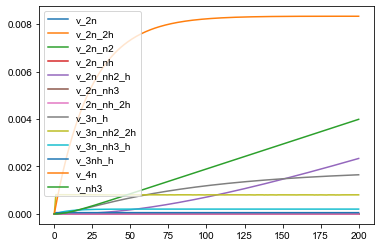

In [65]:
start = ts.at(0)
for i in range(len(start)):
    if str(start.keys()[i]) in ["v_h2", "v_n2", "v_3nh2"]:
        continue
    plt.plot(x_range, sampled[i], label=start.keys()[i])
plt.legend()
plt.show()